ORIE 4580:  Input Modeling from Data
=====

Sid Banerjee, Cornell

Notebook demonstrating techniques for parameter estimation and distribution fitting

In [ ]:
# Preamble to make sure we have all packages we need

import numpy as np
import scipy as sc

# Defining epsilon 
eps = 1e-6
    
# Configuring matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

## No Data: The Triangle Distribution

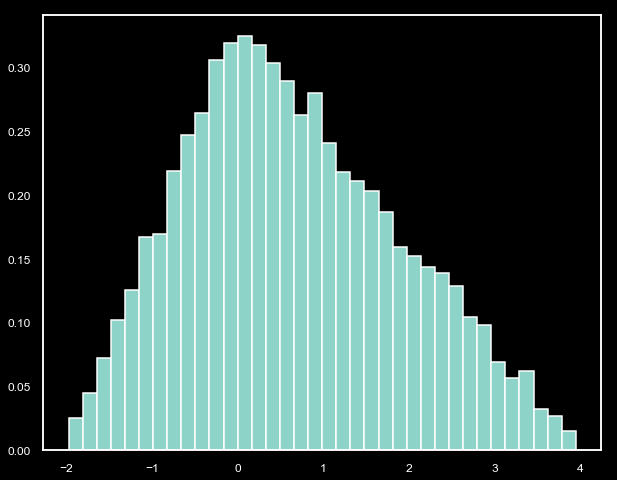

In [ ]:
N = 10000
x_min = -2
x_mode = 0
x_max = 4
plt.figure(figsize=[10,8])
X = np.random.triangular(x_min, x_mode, x_max, N)
plt.hist(X,bins = 'auto',density=True)
plt.show()

## Big Data: The Bootstrap

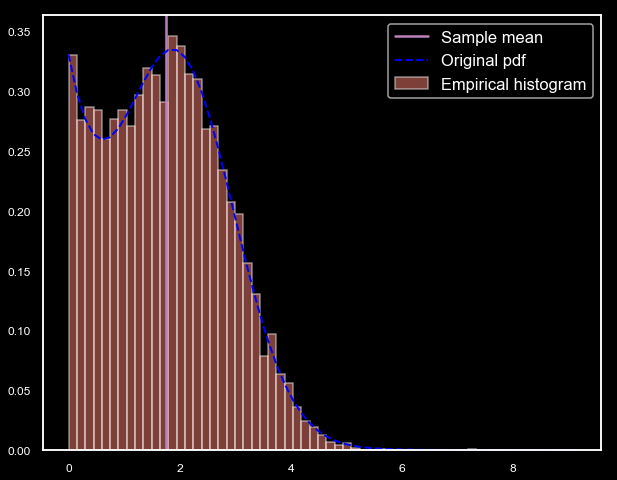

In [ ]:
N = 10000
p_mix = 0.25
X = np.concatenate([np.random.exponential(scale=1,size=int(p_mix*N)), 
                    np.abs(np.random.normal(loc=2,scale=1,size=int((1-p_mix)*N)))])


plt.figure(figsize=[10,8])
n_tmp,bins,patches = plt.hist(X, bins = 'auto', alpha = 0.5 ,density = True, label='Empirical histogram',color=cmap(3))

mean = np.mean(X)
plt.axvline(mean,color = cmap(9),label='Sample mean')

y = p_mix*sc.stats.expon.pdf(bins,scale=1) + (1-p_mix)*sc.stats.foldnorm.pdf(bins,c = 2,loc = 0,scale = 1) 
plt.plot(bins, y, 'b--', linewidth=2,label='Original pdf')

plt.legend(loc=1)
plt.show()

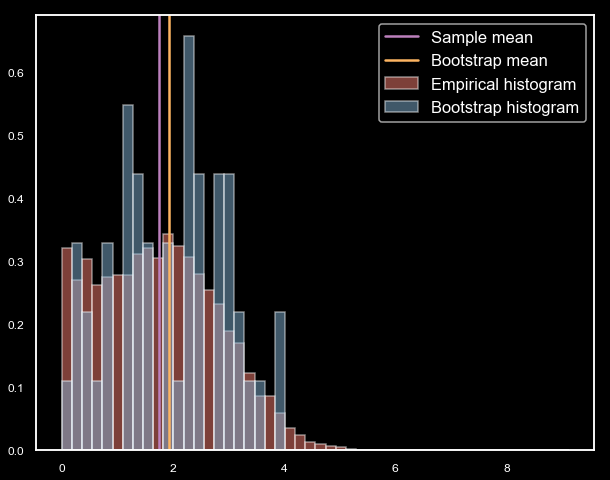

In [ ]:
n = len(X)    #Size of dataset
b = 50      #Number of bootstrap samples

X_b = np.random.choice(X, b)

plt.figure(figsize=[10,8])
mean = np.mean(X) ;  bst_mean = np.mean(X_b)
plt.axvline(mean,color = cmap(9),label='Sample mean')
plt.axvline(bst_mean,color = cmap(5),label='Bootstrap mean')

n_tmp, bins, patches = plt.hist(X, bins = 50, alpha = 0.5 ,density = True, label='Empirical histogram',color=cmap(3))
plt.hist(X_b, bins, alpha = 0.5 ,density = True, label='Bootstrap histogram',color=cmap(4))

plt.legend(loc=1)
plt.show()

In [ ]:
bst_mean = np.mean(X_b)
bst_std = np.std(X_b,ddof=1)
print("Bootstrap mean and standard deviation are "+str(round(bst_mean,2))+" and "+str(round(bst_std,3)))

Bootstrap mean and standard deviation are 1.94 and 1.017


## Moderate Data: Parametric Distributions
### Empirical histogram

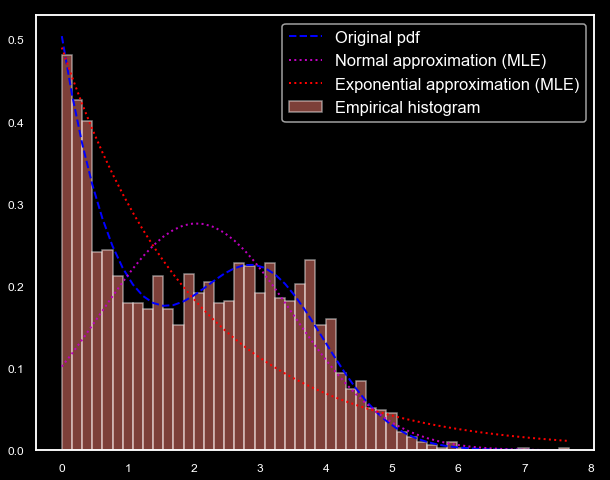

In [ ]:
N = 2000
p_mix = 0.5
normal_center = 3

X = np.concatenate([np.random.exponential(scale=1,size=int(p_mix*N)), 
                    np.abs(np.random.normal(loc=normal_center,scale=1,size=int((1-p_mix)*N)))])

plt.figure(figsize=[10,8])


n_tmp, bins, patches = plt.hist(X, bins = 50, alpha = 0.5 ,density = True, label='Empirical histogram',color=cmap(3))
mean = np.mean(X) ; stddev = np.std(X,ddof=1)
y = p_mix*sc.stats.expon.pdf(bins,scale=1) + (1-p_mix)*sc.stats.foldnorm.pdf(bins,c = normal_center,loc = 0,scale = 1) 
plt.plot(bins, y, 'b--', linewidth=2,label='Original pdf')

z = sc.stats.norm.pdf(bins,loc = mean,scale = stddev) 
plt.plot(bins, z, 'm:', linewidth=2,label='Normal approximation (MLE)')

z = sc.stats.expon.pdf(bins,scale = mean) 
plt.plot(bins, z, 'r:', linewidth=2,label='Exponential approximation (MLE)')
plt.legend(loc=1)
plt.show()

## Empirical CDF

In [ ]:
def emp_cdf(x,cont_corr=True):
    #Return empirical CDF of data x (with option for continuity correction)
    n = len(x)
    x_sort = np.sort(x)
    if cont_corr:
        cdf = (np.arange(1,n+1) - 0.5)/n
    else:
        cdf = (1.0*np.arange(1,n+1))/n
    return x_sort, cdf

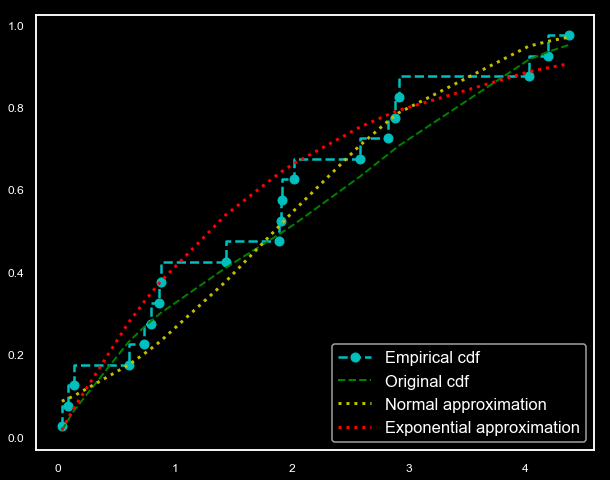

In [ ]:
N = 20
p_mix = 0.5
normal_center = 3
X = np.concatenate([np.random.exponential(scale=1,size=int(p_mix*N)), 
                    np.abs(np.random.normal(loc=normal_center,scale=1,size=int((1-p_mix)*N)))])

plt.figure(figsize=[10,8])

x,ecdf = emp_cdf(X)
# Plotting the empirical cdf as a step function
plt.plot(x,ecdf,'co',label='Empirical cdf',linestyle='--', drawstyle='steps')

y = p_mix*sc.stats.expon.cdf(x,scale=1) + (1-p_mix)*sc.stats.foldnorm.cdf(x,c = normal_center,loc = 0,scale = 1) 
plt.plot(x, y, 'g--', linewidth=2,label='Original cdf')


emp_mean = np.mean(X) ; emp_stddev = np.std(X)

z_1 = sc.stats.norm.cdf(x,loc = emp_mean,scale = emp_stddev) 
plt.plot(x, z_1, 'y:', linewidth=3,label='Normal approximation')
z_2 = sc.stats.expon.cdf(x,scale = emp_mean) 
plt.plot(x, z_2, 'r:', linewidth=3,label='Exponential approximation')

plt.legend(loc=4)
plt.show()

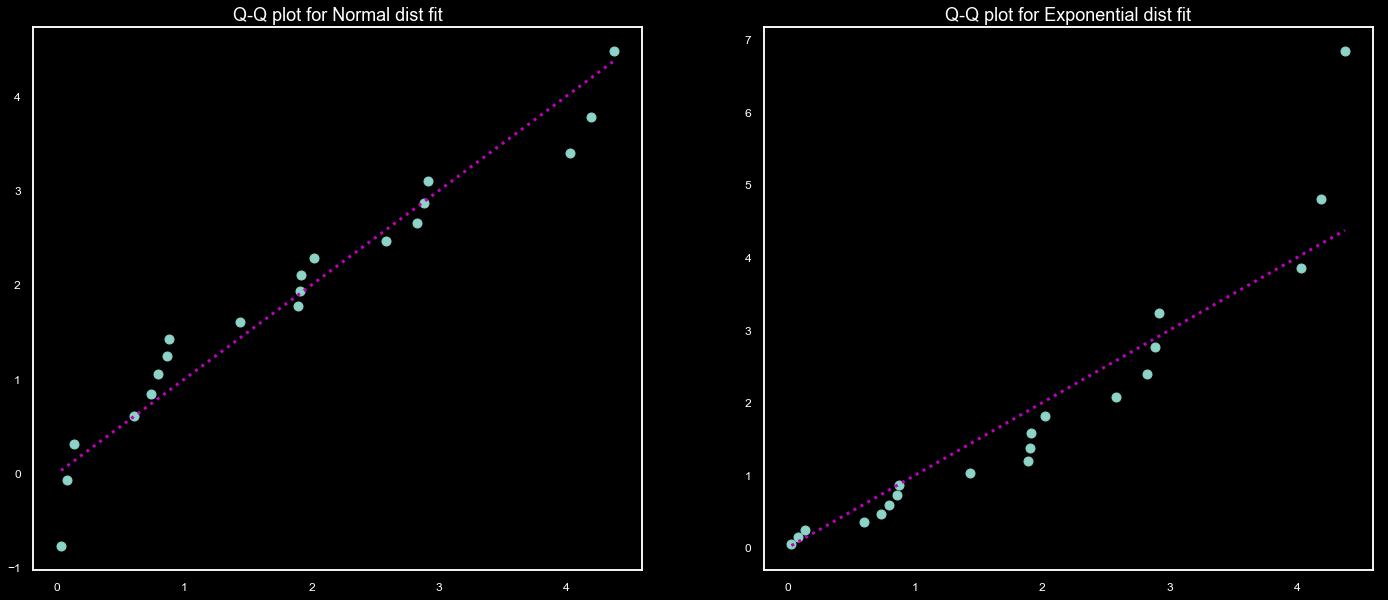

In [ ]:
fig = plt.figure(figsize=(24,10))

ax = fig.add_subplot(1, 2, 1)
cdf_1 = sc.stats.norm.ppf(ecdf,loc = emp_mean,scale = emp_stddev) 
plt.plot(x,cdf_1,'o')
plt.plot(x,x,':m',linewidth=3)
plt.title("Q-Q plot for Normal dist fit")

ax = fig.add_subplot(1, 2, 2)
cdf_2 = sc.stats.expon.ppf(ecdf,scale = emp_mean) 
plt.plot(x,cdf_2,'o')
plt.plot(x,x,':m',linewidth=3)
plt.title("Q-Q plot for Exponential dist fit")

plt.show()

## Estimation Error Example

We are given interarrival times of people arriving to a COVID test site

The MLE estimate for lambda = 2.24869965594


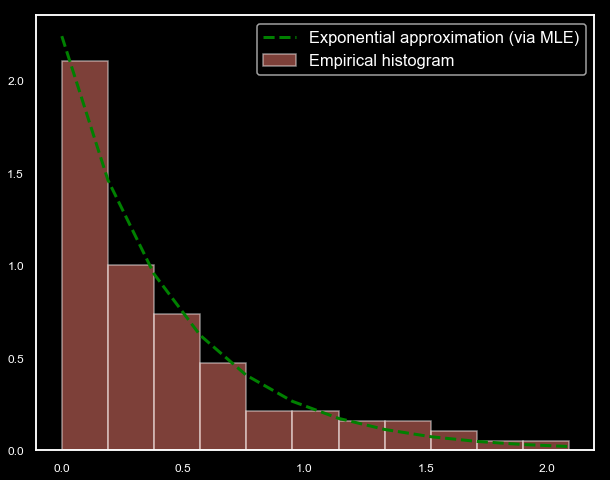

In [ ]:
N = 100
lam = 2.5

X = np.abs(np.random.exponential(size=N,scale=1.0/lam)+ np.random.normal(size=N,loc=0,scale=0.001))

plt.figure(figsize=[10,8])

n_tmp, bins, patches = plt.hist(X, bins = 'auto', alpha = 0.5 ,density = True, label='Empirical histogram',color=cmap(3))


lam_est = 1.0/np.mean(X) 
print("The MLE estimate for lambda = "+str(lam_est))
z = sc.stats.expon.pdf(bins,scale = 1.0/lam_est) 
plt.plot(bins, z, 'g--', linewidth=3,label='Exponential approximation (via MLE)')
plt.legend(loc=1)
plt.show()

### Chi-Square Goodness of Fit Test

In [ ]:
n = np.size(X)
E_min = 6.0
k = int(n/E_min)

s = 1
df = k-s-1

bins = sc.stats.expon.ppf(np.append(1.0*np.arange(k)/k,1-eps),scale = 1.0/lam_est)
obs,bins = np.histogram(X,bins = bins)

exp = float(n/k)*np.ones(k)

D_2 = np.sum((obs - exp)**2/exp)
print("The Chi-Square Test statistic is D^2 = " + str(D_2))

The Chi-Square Test statistic is D^2 = 18.08


In [ ]:
chi_sq_result = sc.stats.chisquare(obs,exp,ddof=s)
print(chi_sq_result)

Power_divergenceResult(statistic=18.079999999999998, pvalue=0.20316148134859213)


### The Kolmogorov-Smirnov Goodness-Of-Fit Test

The KS statistic is D = 0.05918564


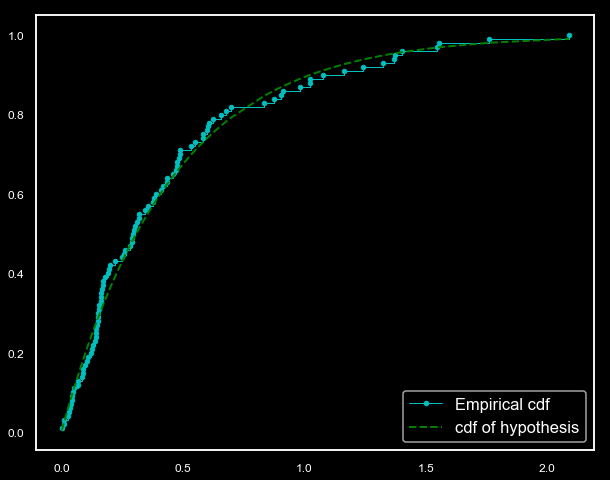

In [ ]:
X_sort,X_ecdf = emp_cdf(X,cont_corr=False)

plt.figure(figsize=[10,8])

plt.step(X_sort,X_ecdf,'c.', linewidth=1,where='post',label='Empirical cdf')

Hyp_cdf = sc.stats.expon.cdf(X_sort,scale=1.0/lam_est)
plt.plot(X_sort, Hyp_cdf, 'g--', linewidth=2,label='cdf of hypothesis')

D_KS = np.max(np.concatenate((np.abs(Hyp_cdf[1:]-X_ecdf[:-1]),np.abs(Hyp_cdf-X_ecdf)),axis=0))
print("The KS statistic is D = "+str(round(D_KS,8)))

plt.legend(loc=4)
plt.show()

In [ ]:
sc.stats.kstest(X,"expon",args=(0,1.0/lam_est))

KstestResult(statistic=0.059185643612892691, pvalue=0.87487852243412367)

## Parameter Sensitivity

We now want to understand how errors in our parameters can affect errors in our estimates of some quantity derived from our distribution. For example, given the arrival data at the test site, we want to understand the average number of people in the test site at any time. For this, we can use a result from queueing theory:

#### The Pollaczek-Khintchine formula

The average number of people waiting at the test site (for service distribution with mean $\mu$, variance $\sigma$) is given by:
$$\mathbb{E}[L] = \rho + \frac{\rho^2 + \lambda^2 \sigma^2}{2(1-\rho)} $$

In [ ]:
def PK_formula(lam,mu,sigma):
    rho = lam/mu
    if rho>1-eps:
        return -1
    else:
        return rho + (rho**2+(lam*sigma)**2)/(2.0*(1-rho))

In [ ]:
err = 0.25
lam_upper = lam_est + err
lam_lower = lam_est - err

service_mu = 3.0; service_sigma = 1.0/3.0
L_upper = PK_formula(lam_upper,service_mu,service_sigma)
L_lower = PK_formula(lam_lower,service_mu,service_sigma)
print("With mu = " + str(round(service_mu,2))+ ", sigma = " + str(round(service_sigma,2))+ 
      ", the expected number of cars waiting is in the range ("+str(round(L_lower,2))+','+str(round(L_upper,2))+')')

service_mu = 6.0; service_sigma = 1.0/3.0
L_upper = PK_formula(lam_upper,service_mu,service_sigma)
L_lower = PK_formula(lam_lower,service_mu,service_sigma)
print("With mu = " + str(round(service_mu,2))+ ", sigma = " + str(round(service_sigma,2))+ 
      ", the expected number of cars waiting is in the range ("+str(round(L_lower,2))+','+str(round(L_upper,2))+')')

With mu = 3.0, sigma = 0.33, the expected number of cars waiting is in the range (2.0,4.98)
With mu = 6.0, sigma = 0.33, the expected number of cars waiting is in the range (0.75,1.16)


### Parametric Bootstrap

Number of unstable instances in bootstrap samples = 0


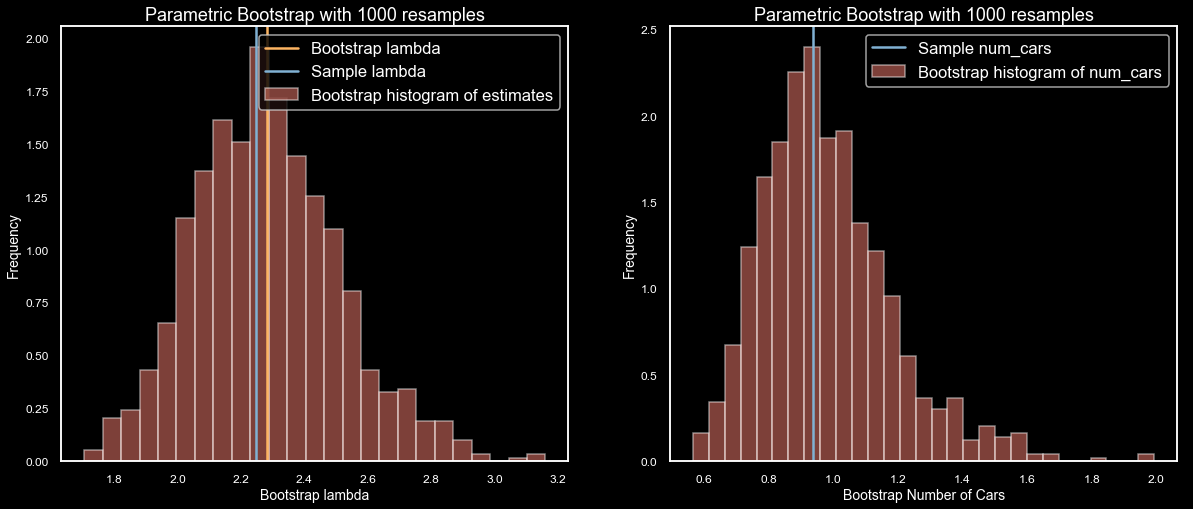

In [ ]:
n = np.size(X)
# Number of resamples
m = 1000

service_mu = 6 ;service_sigma = 1.0/3.0

bst_lam = np.zeros(m)
bst_num_cars = np.zeros(m)
for i in range(m):
    X_b = np.random.exponential(scale = 1.0/lam_est, size = n)
    bst_lam[i] = 1.0/np.mean(X_b)
    bst_num_cars[i] = PK_formula(bst_lam[i],service_mu,service_sigma)


num_unstable = np.sum(bst_num_cars==-1)    
bst_num_cars = bst_num_cars[bst_num_cars!=-1] 


fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1, 2, 1)
bst_lam_mean = np.mean(bst_lam)
n_tmp, bins, patches = plt.hist(bst_lam, bins = 'auto', alpha = 0.5 ,density = True, label='Bootstrap histogram of estimates',color=cmap(3))

plt.axvline(bst_lam_mean,color = cmap(5),label='Bootstrap lambda')
plt.axvline(lam_est,color = cmap(4),label='Sample lambda')
plt.title("Parametric Bootstrap with "+str(m)+" resamples")
plt.xlabel("Bootstrap lambda")
plt.ylabel("Frequency")
plt.legend(loc=1)

ax = fig.add_subplot(1, 2, 2)
bst_cars_mean = np.mean(bst_num_cars)
n_tmp, bins, patches = plt.hist(bst_num_cars, bins = 'auto', alpha = 0.5 ,density = True, label='Bootstrap histogram of num_cars',color=cmap(3))
print("Number of unstable instances in bootstrap samples = "+str(num_unstable))

plt.axvline(PK_formula(lam_est,service_mu,service_sigma),color = cmap(4),label='Sample num_cars')

plt.title("Parametric Bootstrap with "+str(m)+" resamples")
plt.xlabel("Bootstrap Number of Cars")
plt.ylabel("Frequency")


plt.legend(loc=1)
plt.show()